In [1]:
import xarray as xr
import numpy as np
import cmocean as cm
import os
import pandas as pd
from matplotlib import cm as cmap
%matplotlib inline

In [2]:
from dask.distributed import Client

In [3]:
c=Client()
c

2022-05-27 02:44:11,584 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/jm5970/scripts_papers/CEKE_climatology_paper/figures/dask-worker-space/worker-lus2zong', purging
2022-05-27 02:44:11,592 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/jm5970/scripts_papers/CEKE_climatology_paper/figures/dask-worker-space/worker-d_g0yf9a', purging
2022-05-27 02:44:11,598 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/jm5970/scripts_papers/CEKE_climatology_paper/figures/dask-worker-space/worker-2i29jl9q', purging
2022-05-27 02:44:11,604 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/jm5970/scripts_papers/CEKE_climatology_paper/figures/dask-worker-space/worker-jcf39z3o', purging
2022-05-27 02:44:11,610 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/jm5970/scripts_papers/CEKE_climatology_paper/figures/dask-worker-space/worker-4rd_

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 6
Total threads: 24,Total memory: 96.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36681,Workers: 6
Dashboard: /proxy/8787/status,Total threads: 24
Started: Just now,Total memory: 96.00 GiB
Comm: tcp://127.0.0.1:35883,Total threads: 4
Dashboard: /proxy/38565/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:36171,


In [4]:
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.ticker as mticker
import cmocean as cm

In [5]:
land_50m = feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='#DFD1AF',
                                        linewidth=0.2)

In [8]:
trackeddy_trend = xr.open_dataset('../datasets/TrackEddy_Eddy_trends.nc')

In [9]:
trackeddy_trend_amp = xr.open_dataset('../datasets/TrackEddy_Eddy_amp_polarity_trends.nc')

In [15]:
chelton_trend = xr.open_dataset('../datasets/Chelton_Eddy_trends.nc')

In [16]:
trackeddy_trend = (trackeddy_trend).where(trackeddy_trend.x < 355).where(trackeddy_trend.x > 5)

In [17]:
chelton_trend = (chelton_trend).where(chelton_trend.x < 355).where(chelton_trend.x > 5)

In [19]:
from matplotlib import colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """
    Truncate colormap.
    """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [20]:
t_balance = truncate_colormap(cm.cm.curl, 0.1, 0.9)

In [21]:
trackeddy_trend_amp = xr.open_dataset('../datasets/TrackEddy_Eddy_amp_polarity_trends.nc')

In [22]:
import matplotlib.gridspec as gridspec

FileNotFoundError: [Errno 2] No such file or directory: './figures/all_trackeddy_trends_all_regular_divided_V2.pdf'

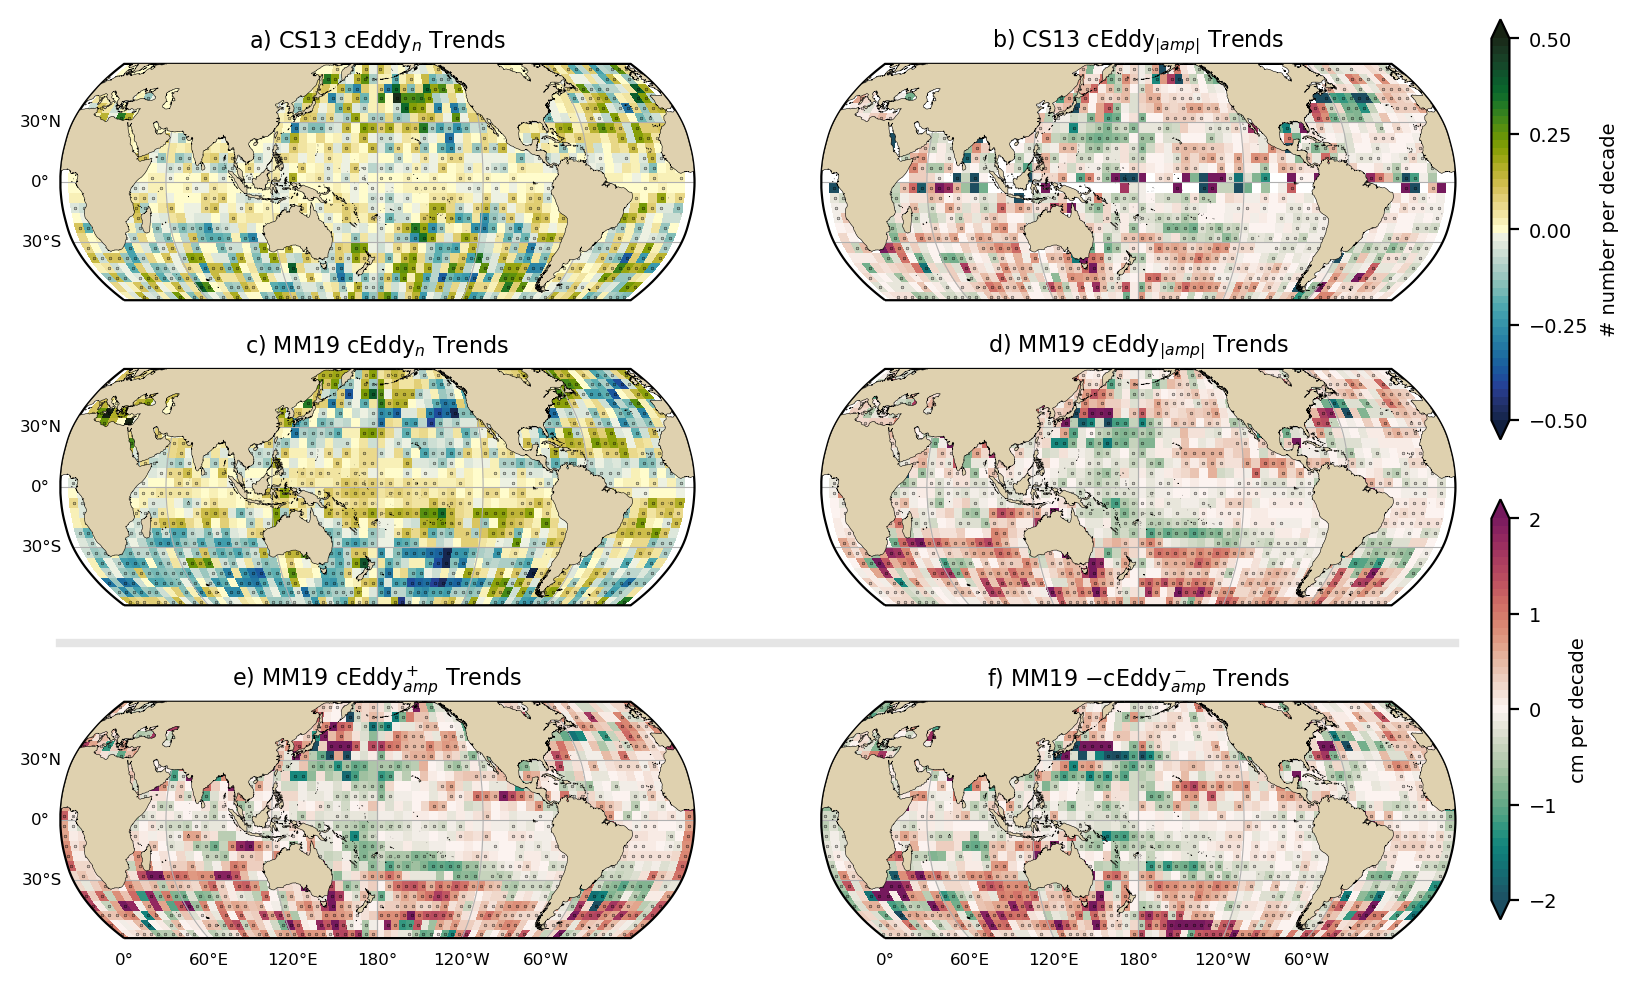

In [23]:
cbar_kwargs=dict(pad=0.15, shrink=1, label=r'')

fig=plt.figure(figsize=(9, 6),dpi=200, )

grid = plt.GridSpec(3, 1, wspace=0, hspace=0.25)

grid_top = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=grid[0:2,0], hspace=0.1)

axs1 = fig.add_subplot(grid_top[0,0],**{'projection': ccrs.Robinson(central_longitude=180)})
axs2 = fig.add_subplot(grid_top[0,1],**{'projection': ccrs.Robinson(central_longitude=180)})
axs3 = fig.add_subplot(grid_top[1,0],**{'projection': ccrs.Robinson(central_longitude=180)})
axs4 = fig.add_subplot(grid_top[1,1],**{'projection': ccrs.Robinson(central_longitude=180)})

grid_buttom = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=grid[2,0])

axs5 = fig.add_subplot(grid_buttom[0,0],**{'projection': ccrs.Robinson(central_longitude=180)})
axs6 = fig.add_subplot(grid_buttom[0,1],**{'projection': ccrs.Robinson(central_longitude=180)})

ax=np.array([[axs1,axs2],[axs3,axs4],[axs5,axs6]])

# fig, ax = plt.subplots(3, 2,)

####################################################################
clm = (chelton_trend.trend_n*10*365).plot(ax=ax[0,0],transform =ccrs.PlateCarree(),cmap=cm.cm.delta,
                                vmin = -0.5, vmax = 0.5, add_colorbar = False,levels=50)
    
X,Y = np.meshgrid(chelton_trend.x,chelton_trend.y)
x_signif = X[(chelton_trend.signif_n==1).values]
y_signif = Y[(chelton_trend.signif_n==1).values]

ax[0,0].plot(x_signif,y_signif,transform =ccrs.PlateCarree(),marker='.',markersize=0.3,linestyle='',zorder=1,color='k')

ax[0,0].set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax[0,0].add_feature(land_50m,zorder=10)
ax[0,0].set_title('a) CS13 $\mathrm{cEddy}_{n}$ Trends',fontsize=8)

clm1 = (chelton_trend.trend_amp*10*365).plot(ax=ax[0,1], transform =ccrs.PlateCarree(), cmap=t_balance,
                                vmin = -2, vmax = 2, add_colorbar = False,levels=50)
    
X,Y = np.meshgrid(chelton_trend.x,chelton_trend.y)
x_signif = X[(chelton_trend.signif_amp==1).values]
y_signif = Y[(chelton_trend.signif_amp==1).values]
    
ax[0,1].plot(x_signif,y_signif,transform =ccrs.PlateCarree(),marker='.',markersize=0.3,linestyle='',zorder=1,color='k')

ax[0,1].set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax[0,1].add_feature(land_50m,zorder=10)
ax[0,1].set_title('b) CS13 $\mathrm{cEddy}_{|amp|}$ Trends',fontsize=8)

####################################################################
clm = (trackeddy_trend.trend_n*10*365).plot(ax=ax[1,0],transform =ccrs.PlateCarree(),cmap=cm.cm.delta,
                                vmin = -0.5, vmax = 0.5, add_colorbar = False,levels=50)
    
X,Y = np.meshgrid(trackeddy_trend.x,trackeddy_trend.y)
x_signif = X[(trackeddy_trend.signif_n==1).values]
y_signif = Y[(trackeddy_trend.signif_n==1).values]

ax[1,0].plot(x_signif,y_signif,transform =ccrs.PlateCarree(),marker='.',markersize=0.3,linestyle='',zorder=1,color='k')

ax[1,0].set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax[1,0].add_feature(land_50m,zorder=10)
ax[1,0].set_title('c) MM19 $\mathrm{cEddy}_{n}$ Trends',fontsize=8)

clm1 = (trackeddy_trend.trend_amp*10*365*100).plot(ax=ax[1,1], transform =ccrs.PlateCarree(), cmap=t_balance,
                                vmin = -2, vmax = 2, add_colorbar = False,levels=50)
    
X,Y = np.meshgrid(trackeddy_trend.x,trackeddy_trend.y)
x_signif = X[(trackeddy_trend.signif_amp==1).values]
y_signif = Y[(trackeddy_trend.signif_amp==1).values]
    
ax[1,1].plot(x_signif,y_signif,transform =ccrs.PlateCarree(),marker='.',markersize=0.3,linestyle='',zorder=1,color='k')

ax[1,1].set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax[1,1].add_feature(land_50m,zorder=10)
ax[1,1].set_title('d) MM19 $\mathrm{cEddy}_{|amp|}$ Trends',fontsize=8)

####################################################################

clm2 = (trackeddy_trend_amp.trend_amp_pos*10*365*100).plot(ax=ax[2,0],transform =ccrs.PlateCarree(),cmap=t_balance,
                                vmin = -2, vmax = 2, add_colorbar = False,levels=50)
    
X,Y = np.meshgrid(trackeddy_trend_amp.x,trackeddy_trend_amp.y)
x_signif = X[(trackeddy_trend_amp.signif_amp_pos==1).values]
y_signif = Y[(trackeddy_trend_amp.signif_amp_pos==1).values]

ax[2,0].plot(x_signif,y_signif,transform =ccrs.PlateCarree(),marker='.',markersize=0.3,linestyle='',zorder=1,color='k')

ax[2,0].set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax[2,0].add_feature(land_50m,zorder=10)
ax[2,0].set_title('e) MM19 $\mathrm{cEddy}_{amp}^+$ Trends',fontsize=8)

clm3 = (trackeddy_trend_amp.trend_amp_neg*10*365*100).plot(ax=ax[2,1], transform =ccrs.PlateCarree(), cmap=t_balance,
                                vmin = -2, vmax = 2, add_colorbar = False,levels=50)
    
X,Y = np.meshgrid(trackeddy_trend_amp.x,trackeddy_trend_amp.y)
x_signif = X[(trackeddy_trend_amp.signif_amp_neg==1).values]
y_signif = Y[(trackeddy_trend_amp.signif_amp_neg==1).values]
    
ax[2,1].plot(x_signif,y_signif,transform =ccrs.PlateCarree(),marker='.',markersize=0.3,linestyle='',zorder=1,color='k')

ax[2,1].set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax[2,1].add_feature(land_50m,zorder=10)
ax[2,1].set_title('f) MM19 $-\mathrm{cEddy}_{amp}^-$ Trends',fontsize=8)

####################################################################

cbar_ax = fig.add_axes([0.92, 0.55, 0.01, 0.35])
cbar=fig.colorbar(clm, cax=cbar_ax, orientation='vertical',ticks=np.arange(-0.5,0.51,0.25))
cbar.set_label('# number per decade', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.35])
cbar=fig.colorbar(clm1, cax=cbar_ax, orientation='vertical',ticks=np.arange(-2,2.1,1))
cbar.set_label('cm per decade', rotation=90, fontsize=7)
cbar.ax.tick_params(labelsize=7) 

gl = ax[0,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax[0,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.left_labels = False
gl.right_labels = False
gl.bottom_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax[1,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.bottom_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax[1,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.bottom_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax[2,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

gl = ax[2,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=0.4)
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}
gl.rotate_labels = False
gl.top_labels = False
gl.left_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator(np.arange(-30,60,30))

ax[2,1].plot([-1.2, 1], [1.25, 1.25], color='gray', lw=3, alpha=0.2, transform=ax[2,1].transAxes, clip_on=False)

# plt.subplots_adjust(wspace=0.01, hspace=0.1)
plt.savefig('./Figure_6_trends.pdf',dpi=300,bbox_inches='tight')